# Comparing Total Wage Between Males and Females

## 1. Introduction

**Research Question:** Is there a significant difference between the average salary for men and women? 

*Variable of interest:* Annual Salary. <br>
*Categories:* Men and Women.

Past research has shown there is an appreciable difference in salary between men and women, even when working the same jobs (Hoisl & Mariani, 2016). We want to see if the same pattern can be observed when we use a dataset to compare the mean salary between these two genders. To further look into this question, we will use the dataset glassdoor_salaries.csv from 2019, containing 1001 rows of data. The dataset contains 9 columns (see Preliminary Results section for details). As we want to compare gender and total salary, we will clean and wrangle our dataset. Then we will only select the total salary and gender columns.

In [2]:
# Set up
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)

set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## 2. Method and Results

### Preliminary Results

We will first read the data from from a public github repository to make the data reproducible. We then print a preview of the dataset to see the column names and a few observations.

In [3]:
# Reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/STAT201-GroupProject/main/glassdoor_salaries.csv"
untidy_salary_data <- read_csv(url)

head(untidy_salary_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


***Table 01. Salary data set***

We then combine the base pay and bonus into one column and filter for NA values and the variable of interest.

In [4]:
# Tidy dataset, combine BasePay and Bonus into Annual_Salary
salary_data <- 
    untidy_salary_data %>%
    mutate(Annual_Salary = BasePay + Bonus,   # combine BasePay and Bonus into Annual_Salary
           Gender = as.factor(Gender)) %>%    # convert Gender column from <chr> to <fct> 
    select(Gender, Annual_Salary) %>%         # remove irrelevant columns
    na.omit()                                 # remove NAs


head(salary_data)

Gender,Annual_Salary
<fct>,<dbl>
Female,52301
Male,119604
Female,99476
Male,118234
Male,108783
Female,81016


***Table 02. Tidy dataset with combined BasePay and Bonus***

We compare parameter estimates of the males and females by taking the mean, median, and standard deviation of each the male and female subgroups. This provides a quick comparison of the annual salary of males and females.

In [5]:
# table of point estimates of annual salary by gender
salary_data_summary <- 
    salary_data %>% 
    group_by(Gender) %>% 
    summarize(Sample_Size = n(),                              # count number of observations  
              Mean_Salary = mean(Annual_Salary),              # calculate mean
              Min_Salary = min(Annual_Salary),                # calculate min
              Lower_Quartile = quantile(Annual_Salary, 0.25), # calculate lower quartile
              Median_Salary = median(Annual_Salary),          # calculate median
              Upper_Quartile = quantile(Annual_Salary, 0.75), # calculate upper quartile
              Max_Salary = max(Annual_Salary),                # calculate max
              SD_Salary = sd(Annual_Salary))                  # calculate standard deviation              

salary_data_summary

Gender,Sample_Size,Mean_Salary,Min_Salary,Lower_Quartile,Median_Salary,Upper_Quartile,Max_Salary,SD_Salary
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,468,96416.83,40828,80866.50,96571.0,112660.5,168968,24202.16
Male,532,104918.68,41030,87791.75,105100.5,121617.0,184010,25329.57


***Table 03: Point of estimates of annual salary based on gender***. *This table suggested that Females have a slightly lower mean salary and the minumum and maximum are also lower than their males' counterparts.*

Plot male's and female's salary data using histograms and facet_wrap to have them next to each other for easier comparison.

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


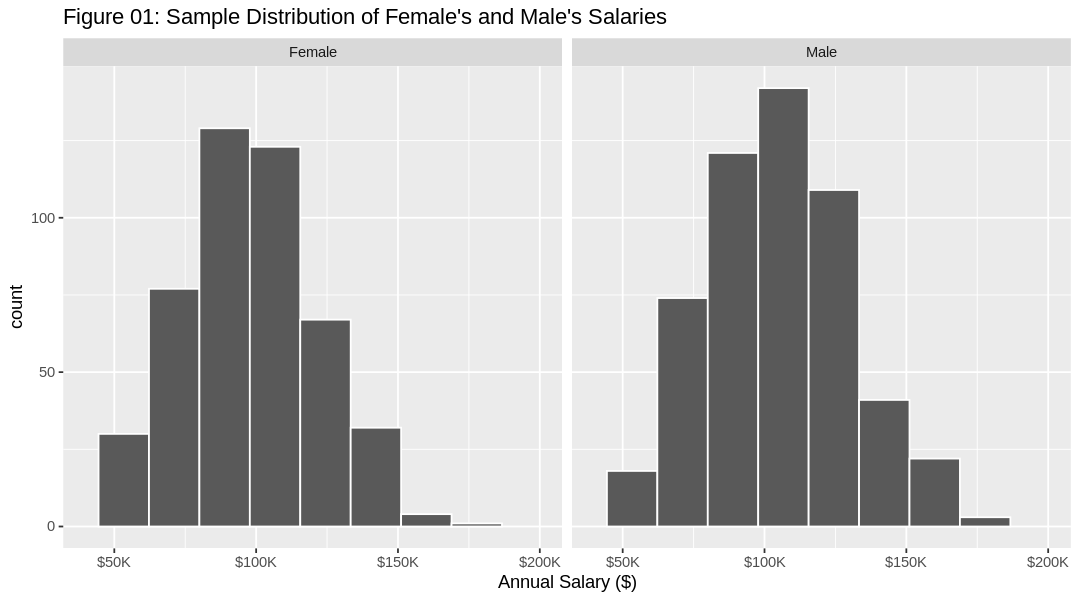

In [6]:
# compare the sample distribution of male and female salaries
options(repr.plot.width = 9, repr.plot.height = 5)

salary_sample_distribution <- 
    salary_data %>%
    ggplot() +
    geom_histogram(aes(x = Annual_Salary),color = "white", bins =10) +
    facet_wrap(~Gender, scales = "fixed") +
    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K"),  # change x-axis scale label for readability; 
                       limits = c(40000, 200000)) +                                 # set limits for x-axis   
    labs(x = "Annual Salary ($)") +
    ggtitle("Figure 01: Sample Distribution of Female's and Male's Salaries")

salary_sample_distribution

*This figure suggests that the male's and female's sample distribution is fairly normally distributed. Similar to Table 01, the histograms suggest that Females generally have lower mean, max, and min salaries.*

We can then plot the male and female data using a boxplot. This provides an alternative visual comparison to the histogram. This shows a comparison of the medians and the upper and lower quartiles. Additionally, the plot provides insight into the minimum and maximum.

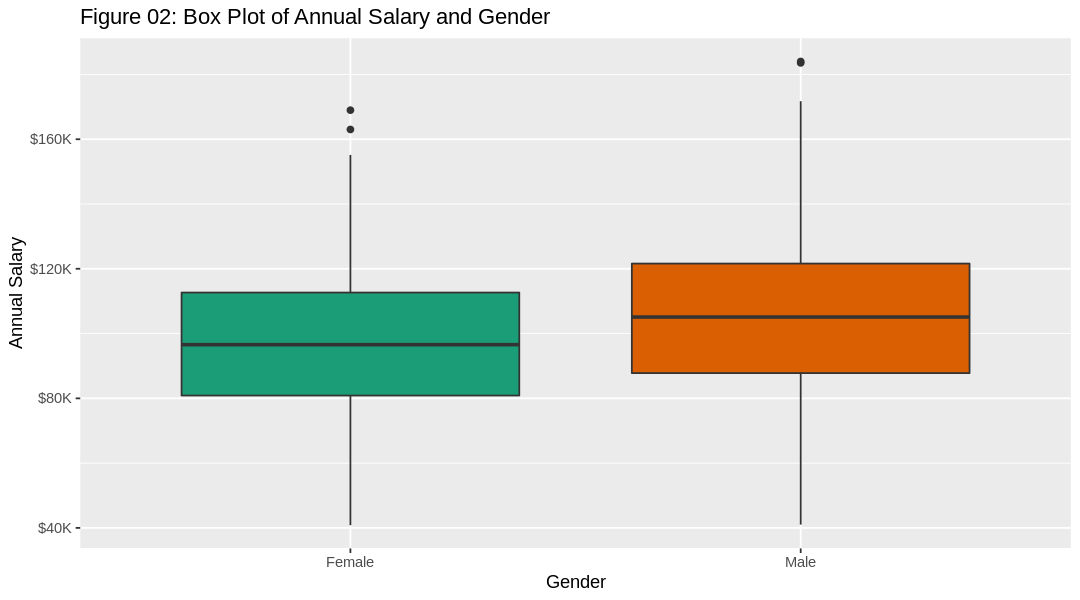

In [7]:
# Boxplot to compare between Male and Female
options(repr.plot.width = 9, repr.plot.height = 5)

salary_boxplot <- 
    salary_data %>%
    ggplot() +
    geom_boxplot(aes(y = Annual_Salary, x = Gender, fill = Gender)) +
    labs(y = "Annual Salary") +
    scale_fill_brewer(palette = "Dark2") +
    scale_y_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +  # change y-axis scale label for readability
    theme(legend.position = "none") +                                                 # remove abundant legend box
    ggtitle("Figure 02: Box Plot of Annual Salary and Gender")

salary_boxplot

*The above plot suggests that there are only a few outliers and there is a difference between these groups. This difference is illustrated through the male group’s box plot having a higher mean and most observations have higher salary than the female group.*

#### Confidence Interval

In [8]:
# set confidence interval
conf.level <- 0.95

In [9]:
## obtain confidence interval at 95% confidence level using bootstrap
ci_bootstrap <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    generate(type = "bootstrap", reps = 5000) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female")) %>%
    get_ci(level = conf.level)

In [10]:
## obtain confidence interval at 90% confidence level using theory based approach

# filter male_salary
male_salary_summary <- salary_data %>%
    filter(Gender == "Male") %>%
    summarise(n = n(),
              mean = mean(Annual_Salary),
              sd = sd(Annual_Salary))

# filter female_salary
female_salary_summary <- salary_data %>%
    filter(Gender == "Female") %>%
    summarise(n = n(),
              mean = mean(Annual_Salary),
              sd = sd(Annual_Salary))

# calculate standard error
se <- sqrt((male_salary_summary$sd)^2/male_salary_summary$n + (female_salary_summary$sd)^2/female_salary_summary$n)

# calculate lower and upper ci using t-distribution
ci_theory <- tibble(
  lower_ci = male_salary_summary$mean - female_salary_summary$mean - qt((1-(1-conf.level)/2), df = (male_salary_summary$n + female_salary_summary$n - 2)) * se,
  upper_ci = male_salary_summary$mean - female_salary_summary$mean + qt((1-(1-conf.level)/2), df = (male_salary_summary$n + female_salary_summary$n - 2)) * se
)

In [11]:
## combine 2 tibbles of ci into 1 
full_join(ci_bootstrap, ci_theory, by = c("lower_ci", "upper_ci")) %>%
     add_column(Method = c("Bootstrap", "t-distribution"),
                .before = "lower_ci") %>%
     mutate(range = upper_ci - lower_ci)

Method,lower_ci,upper_ci,range
<chr>,<dbl>,<dbl>,<dbl>
Bootstrap,5462.675,11505.10,6042.425
t-distribution,5425.545,11578.15,6152.605


***Table 04. The confidence intervals at 95% Confidence Level calculated from 2 different methods***

...

### Hypothesis Test

Using just a sample mean is not sufficient because there is a possibility that the difference in means could happen by chance. Thus, a more statistical test should be used to answer the question. We will use a t-test to test the difference of two sample means (male and female) since we do not have access to the whole population. One assumption of using a two-sample t-test is that the observations in one sample are independent of those in the other sample. The histograms and box plot generated showing the data are approximately normally distributed, hence the t-test is valid for use in this situation.

We will determine if there is a significant difference in the salaries, and if applicable, its magnitude. Therefore, conducting a hypothesis test with the following hypotheses would provide a more accurate conclusion:

**Null hypothesis:** μ Male = μ Female 

**Alternative hypothesis:**  μ Male > μ Female 

We are expecting our results to show the salary of males to be greater than females based on existing studies from Hoisl & Marian (2016) and Blau & Kahn (2017), so a one-tailed alternative is appropriate.

The formula that we will use to perform the t-test is: 
$$ T = \frac{{{\mu}_{male}}-{{\mu}_{female}} - d_0} {\sqrt{\frac{s_{male}^2}{n_{male}} + \frac{s_{female}^2}{n_{female}}} } $$

$d_0$ would be 0 since our null hypothesis is that there is no difference between the male and female salary.

With sufficiently large sample size and sample distributions closely resembling a normal distribution (see histograms and box plot), our results would be trustworthy in reporting the wage gap since the data used is primary numerical data.
This result would corroborate conclusions of current literature on this subject. Future investigations could explore the underlying cause of the difference in salary as well as look into other factors that affect it. 

#### Null Distribution through Permutation

The first step in completing a statistical hypothesis test using bootstrapping was to calculate the observed test statistic: the difference in mean annual salaries between women and men. The value of the stat parameter was determined to be 8501.847.

In [12]:
# calculate the observed difference in mean from salary_data using infer package
# Male's mean minus Females' mean
obs_diff_in_means <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female"))

obs_diff_in_means

stat
<dbl>
8501.847


Next, 5000 samples were generated using the infer workflow from the null distribution, which as per our null hypothesis would be our sampling distribution if the mean annual salary of males was equal to that of females. The result of the hypothesis test was visualized by plotting the null distribution and displaying the test statistic as a red line shaded to the right.

In [13]:
# generate 5000 samples from the null distribution (sampling distribution if H0 were true) using infer package
# Male's mean minus Females' mean
null_diff_in_salary <- 
    salary_data %>%
    specify(formula = Annual_Salary ~ Gender) %>% 
    hypothesize(null = "independence") %>%
    generate(type = "permute", reps = 5000,) %>% 
    calculate(stat = "diff in means", order = c("Male", "Female")) 

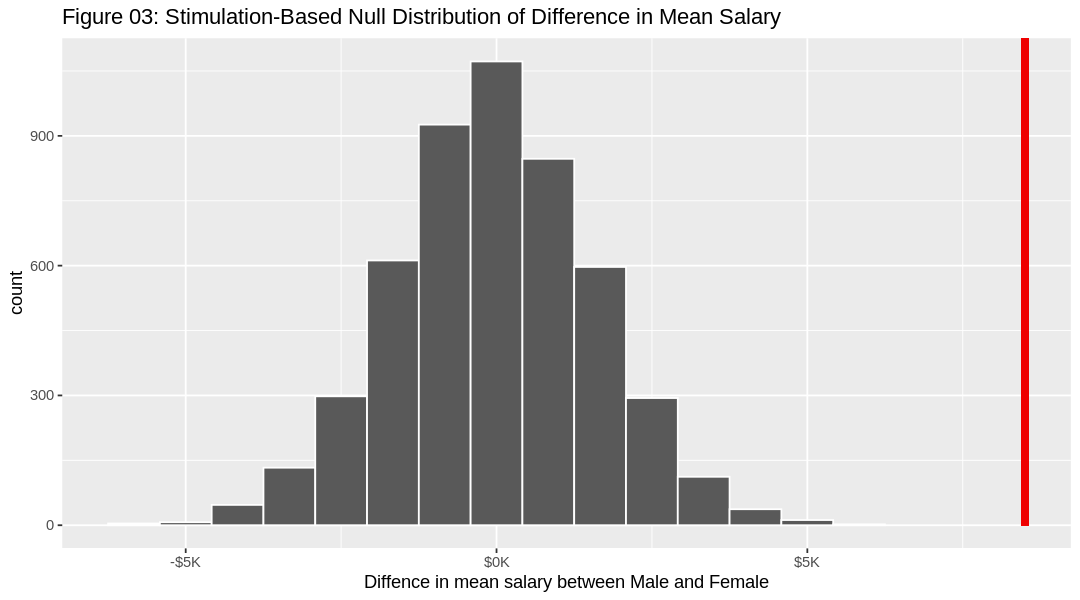

In [14]:
# visualize the null distribution and shade in the p_value
null_distribution <- 
    null_diff_in_salary %>%
    visualize() +
    shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
    xlab("Diffence in mean salary between Male and Female") +
    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +         # change x-axis scale label for readability; 
    ggtitle("Figure 03: Stimulation-Based Null Distribution of Difference in Mean Salary") 

null_distribution

*In Figure 03, it is evident that the observed test statistic (in red) obtained from our sample is much more extreme than the statistics obtained from sampling distribution if the null hypothesis were true.*

In [15]:
# obtain p_value
p_value_null_distribution <-
    null_diff_in_salary %>%
    get_p_value(obs_stat = obs_diff_in_means, direction = "right")

p_value_null_distribution

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Obtaining the p value of this test using the bootstrap hypothesis test piped into the get_p_value function returns us a p value of 0. Finding a p value of 0 is possible, but indicates that the null hypothesis cannot be true for the observed test statistic – i.e. our observed data does not at all match the distribution expected under the null hypothesis of our completed statistical test.

#### T-test through permutation

We will use a two-sample t-statistic as the test statistic. Firstly, 5000 samples were generated using the infer workflow, this would show the sampling distribution of the difference in mean salaries of males and females assuming the null hypothesis is true. 

In [ ]:
# Generate 5000 samples from the null distribution of t
# i.e. construct the distribution of the observed difference in mean of male and female salaries using infer package

null_distribution_salary_t <- salary_data %>% 
  specify(formula = Annual_Salary ~ Gender) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 5000, type = "permute") %>% 
  calculate(stat = "t", order = c("Male", "Female"))

In [ ]:
# Compute the observed two-sample t-statistic
obs_two_sample_t <- salary_data %>% 
  specify(formula = Annual_Salary ~ Gender) %>% 
  calculate(stat = "t", order = c("Male", "Female"))

obs_two_sample_t

In [ ]:
# Visualize the null distribution of t and shade in the p_value to show 
# the values that are at or above the observed two-sample t-statistic (5.423)
visualize(null_distribution_salary_t, method = "both") +
  shade_p_value(obs_stat = obs_two_sample_t, direction = "right") +
  ggtitle("Figure 04. Stimulation-Based and Theoretical t Null Distributions")

*Figure 4 shows the null t-distribution for the t-test using the permutation method. The red vertical line on the right of the plot depicts the observed test statistic (i.e. 5.423247). It should be noted that it is significantly further to the right than the rest of the distribution, indicating that the observed test statistic does not overlap with the null distribution. This makes sense given that we found a p value of 0.*

The warning message tells us to check for the conditions. We have met all three conditions: 1. resembles a normal distribution since large sample sizes. 2. Two samples are independent of each other. 3. All observations are independent of each other.

In [ ]:
# Compute P value
p_value_permute_t_test <- null_distribution_salary_t %>% 
                          get_p_value(obs_stat = obs_two_sample_t, direction = "right")
p_value_permute_t_test 

Hence, we obtain the p vlaue of 0 using t-test through permutation. We reject the null hypothesis (H0). Obtaining a 0 P value indicates that there is 0 of the 5000 samples could have occurred under the null hypothesis (0 probability). This result implies that it is rarely that these results are due to sampling variation, and there is a strong evidence to reject the null hypothesis.

#### T-test through theory based approach

In [ ]:
# filter males' and females' salary
male_salary <- salary_data %>%
    filter(Gender == "Male") %>%
    pull(Annual_Salary)

female_salary<- salary_data %>%
    filter(Gender == "Female") %>%
    pull(Annual_Salary)

# perform theory-based t-test using t.test function
theory_t_test <- 
    tidy(
        t.test(x = male_salary,
               y = female_salary,
               alternative = "greater",
               conf.level = conf.level,
               paired = FALSE)
        ) %>%
    select(p.value, estimate, statistic) 

p_value_theory_t_test <- theory_t_test %>% select(p.value)

p_value_theory_t_test

## 4. Conclusion and Discussion

In [ ]:
# create a tibble for the p_values
p_value_tibble <- 
    tibble_row("t-test: theory-based" = list(p_value_theory_t_test), 
               "t-test: permutation" = list(p_value_permute_t_test), 
               "null distribution" = list(p_value_null_distribution)) %>%
                pivot_longer(cols = everything(),                          # transform the tibble for readability
                             names_to = "type",
                             values_to = "p_value") %>%
    add_column(conclusion = c("significant salary difference","significant salary difference", "significant salary difference"))

p_value_tibble

***Table 05. p-values based on different tests***

## 5. References

* Arceo-Gomez, E. O., Campos-Vazquez, R. M., Badillo, R.Y. et al. (2022). Gender stereotypes in job advertisements: What do they imply for the gender salary gap?. J Labor Res 43, 65–102. https://doi.org/10.1007/s12122-022-09331-4

* Blau, F. D. & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. J Econ Lit 55(3):789–865. https://doi.org/10.1257/jel.20160995

* Hoisl, K. & Mariani, M. (2016). It’s a Man’s Job: Income and the Gender Gap in Industrial Research. Management Science 63(3):766-790.
https://doi.org/10.1287/mnsc.2015.2357

* Jauhari, N. (2019). Glassdoor- Analyze Gender Pay Gap [Dataset]. Kaggle. https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/discussion  